## Digital Image Processing, ECE419

Ernesto Colon

The Cooper Union Department of Electrical Engineering


February 19th, 2021

References:
- Digital Image Processing Using Matlab [DIPUM] by Gonzalez et al., 3rd ed
- Digital Image Processing by Gonzalez et al., 4th ed

**The following set of notes and example scripts are part of my independent study sessions and adapted from the references outlined above. My main reference is DIPUM and complemented with online documentation. As I go through the theory and textbook examples, I am translating the code and image processing techniques to Python.**

## Color Image Processing Notes / Exercises

In [1]:
#Importing the libraries
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
import ec_img_utils
import skimage.util
from skimage import io
import scipy.fft
from skimage import transform
import pandas as pd
import skimage.color

Objects may reflect, absorb or transmit light that strikes them. The amount of light that is reflected by an object,
for example, is typically a function of the light's wavelength. This wavelength dependency in addition to the properties
of the illuminating source and the way our visual system works gives rise to color perception.

The human eye has two type of light sensitive cells, *rods* and *cones*. The rods are active mainly in low light
situations, and their contribution to color perception is minimal. That is the reason why we see the world almost as
grayscale at night when there is not much illumination around us. The cone cells, on the other hand, activate at higher
light intensity levels and are responsible for sending color information to our brain.

An illuminating source has a specific power spectral density associated with it which we can denote as $P(\lambda)$.
When we have the illuminating source's PSD and the object's relative reflectance curves, we can compute how an object
responds to the illumination as a function of wavelength.

Colors can be represented as points in multi-dimensional space. The most familiar color space to us is the RGB space.
The RGB color space is only one of many color spaces in widespread use. We refer to the color space dimensions as the
*primaries*. For example, in the RGB color space, the red, green, and blue are the primaries.

In a color matching experiment, Wright and Guild and Petavel (independently) had a light source with a known PSD and
three monochromatic primaries that they varied in different intensity combinations until individuals perceived the
combinations as the known light source. The result is a set of color matching functions
($\bar r(\lambda),\bar b(\lambda), \bar b(\lambda)$) that can be used to compute tristimulus values. These are the
well-known RGB values we are used to working with. The RGB tristimulus values can be computed as follows:

\begin{equation}
R = \int_{380}^{780} \bar r(\lambda)P(\lambda) \,d\lambda
\end{equation}

\begin{equation}
G = \int_{380}^{780} \bar g(\lambda)P(\lambda) \,d\lambda
\end{equation}

\begin{equation}
B = \int_{380}^{780} \bar b(\lambda)P(\lambda) \,d\lambda
\end{equation}

The International Commission on Illumination (CIE) is a standardization body or commission as the name explicitly calls
out, that defines certain conventions. For example, one set of tristimulus values that are usef very widely are the XYZ
primaries. These are related to RGB via the linear transformation:

\begin{equation}
\begin{bmatrix} X \\ Y \\ Z \end{bmatrix}
= \begin{bmatrix}
2.768892 & 1.751748 & 1.130160\\
1.000000 & 4.590700 & 0.060100\\
0.000000 & 0.056508 & 5.594292
\end{bmatrix}
\begin{bmatrix} R \\ G \\ B \end{bmatrix}
\end{equation}

Below, we plot the set of matching functions corresponding to both the RGB and XYZ color spaces. The support package for
DIPUM 3rd ed. has the CIE Standard Observer xyz color matching functions as a function of wavelength in steps of 1nm. I
wrote a function to go from xyz to rgb and vice versa and obtained the corresponding rgb color matching functions as well.

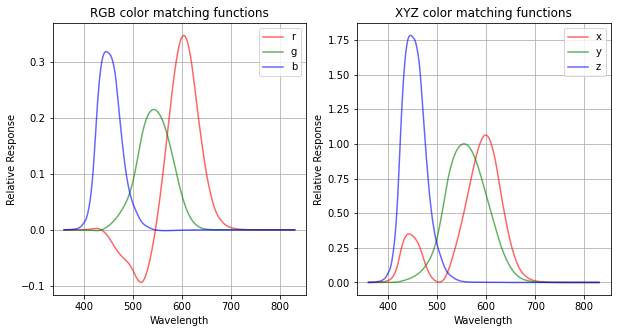

In [2]:
# import the CIE 1931 Standard Observer Data
cie_std_obs = pd.read_csv('CIE 1931 Standard Observer (1nm)_csv.csv')

# convert from XYZ to RGB using my custom function (see ec_img_utils)
cie_std_obs_rgb = ec_img_utils.my_xyz2rgb(cie_std_obs.to_numpy()[:, 1:4])

# plot the x, y, z color matching functions
fig_col_mat, ax_col_mat = plt.subplots(1, 2, figsize=(10,5))
ax_col_mat = ax_col_mat.ravel()

ax_col_mat[0].plot(cie_std_obs['lambda'], cie_std_obs_rgb[:,0], c='r', alpha=0.6, label='r')
ax_col_mat[0].plot(cie_std_obs['lambda'], cie_std_obs_rgb[:,1], c='g', alpha=0.6, label='g')
ax_col_mat[0].plot(cie_std_obs['lambda'], cie_std_obs_rgb[:,2], c='b', alpha=0.6, label='b')
ax_col_mat[0].set_title('RGB color matching functions')
ax_col_mat[0].set_xlabel('Wavelength')
ax_col_mat[0].set_ylabel('Relative Response');
ax_col_mat[0].legend()
ax_col_mat[0].grid()

ax_col_mat[1].plot(cie_std_obs['lambda'], cie_std_obs['x'], c='r', alpha=0.6, label='x')
ax_col_mat[1].plot(cie_std_obs['lambda'], cie_std_obs['y'], c='g', alpha=0.6, label='y')
ax_col_mat[1].plot(cie_std_obs['lambda'], cie_std_obs['z'], c='b', alpha=0.6, label='z')
ax_col_mat[1].set_title('XYZ color matching functions')
ax_col_mat[1].set_xlabel('Wavelength')
ax_col_mat[1].set_ylabel('Relative Response');
ax_col_mat[1].legend()
ax_col_mat[1].grid()
